In [1]:
with open("./test12.txt", "r") as f:
    grid = [[char for char in line.strip()] for line in f]

for row in grid:
    print("".join(row))

RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE


In [ ]:
plots = []
for y, row in enumerate(grid):
    for x, char in enumerate(row):
        if char == "#":
            plots.append((x, y))

In [4]:
def calculate_region_properties(grid):
    def dfs(x, y, char):
        if x < 0 or x >= len(grid[0]) or y < 0 or y >= len(grid) or grid[y][x] != char:
            return 0, 0
        grid[y][x] = None  # Mark the cell as visited
        points = set()
        points.add((x, y, char))
        count = 1
        perimeter = 4 - sum(1 for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)] if 0 <= x + dx < len(grid[0]) and 0 <= y + dy < len(grid) and grid[y + dy][x + dx] == char)
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(grid[0]) and 0 <= ny < len(grid):
                if grid[ny][nx] == char:
                    c, p, points = dfs(nx, ny, char)
                    count += c
                    perimeter += p
                    points.add((nx, ny, char))
                else:
                    perimeter += 1
            else:
                perimeter += 1
        return count, perimeter, points

    regions = set()
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            if grid[y][x] is not None:
                char = grid[y][x]
                count, perimeter, points = dfs(x, y, char)
                regions.add((count, perimeter, points))
    return regions

regions = calculate_region_properties(grid)
print(regions)

TypeError: unhashable type: 'set'

In [10]:
with open("./test12.txt", "r") as f:
    grid = [[char for char in line.strip()] for line in f]
def calculate_region_properties(grid):
    def dfs(x, y, char):
        if x < 0 or x >= len(grid[0]) or y < 0 or y >= len(grid) or grid[y][x] != char:
            return 0, 0
        grid[y][x] = None  # Mark the cell as visited
        count = 1
        perimeter = 0
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(grid[0]) and 0 <= ny < len(grid):
                if grid[ny][nx] == char:
                    c, p = dfs(nx, ny, char)
                    count += c
                    perimeter += p
                else:
                    perimeter += 1
            else:
                perimeter += 1
        return count, perimeter

    regions = []
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            if grid[y][x] is not None:
                char = grid[y][x]
                count, perimeter = dfs(x, y, char)
                regions.append((count, perimeter, char))
    return regions

regions = calculate_region_properties(grid)
for region in regions:
    count, perimeter, char = region
    print(f"Region with character '{char}' has {count} points and a perimeter of {perimeter} and cost of {count * perimeter}.")

Region with character 'R' has 12 points and a perimeter of 37 and cost of 444.
Region with character 'I' has 4 points and a perimeter of 13 and cost of 52.
Region with character 'C' has 14 points and a perimeter of 43 and cost of 602.
Region with character 'F' has 10 points and a perimeter of 31 and cost of 310.
Region with character 'V' has 13 points and a perimeter of 40 and cost of 520.
Region with character 'J' has 11 points and a perimeter of 34 and cost of 374.
Region with character 'C' has 1 points and a perimeter of 4 and cost of 4.
Region with character 'E' has 13 points and a perimeter of 40 and cost of 520.
Region with character 'I' has 14 points and a perimeter of 43 and cost of 602.
Region with character 'M' has 5 points and a perimeter of 16 and cost of 80.
Region with character 'S' has 3 points and a perimeter of 10 and cost of 30.


In [11]:
with open("./test12.txt", "r") as f:
    grid = [[char for char in line.strip()] for line in f]
def calculate_region_properties(grid):
    def dfs(x, y, char):
        if x < 0 or x >= len(grid[0]) or y < 0 or y >= len(grid) or grid[y][x] != char:
            return 0, 0
        grid[y][x] = None  # Mark the cell as visited
        count = 1
        adjacent_same_char = sum(1 for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)] if 0 <= x + dx < len(grid[0]) and 0 <= y + dy < len(grid) and grid[y + dy][x + dx] == char)
        perimeter = 4 - adjacent_same_char
        for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(grid[0]) and 0 <= ny < len(grid):
                if grid[ny][nx] == char:
                    c, p = dfs(nx, ny, char)
                    count += c
                    perimeter += p
        return count, perimeter

    regions = []
    for y in range(len(grid)):
        for x in range(len(grid[0])):
            if grid[y][x] is not None:
                char = grid[y][x]
                count, perimeter = dfs(x, y, char)
                regions.append((count, perimeter, char))
    return regions

regions = calculate_region_properties(grid)
for region in regions:
    count, perimeter, char = region
    print(f"Region with character '{char}' has {count} points and a perimeter of {perimeter} and cost of {count * perimeter}.")

Region with character 'R' has 12 points and a perimeter of 33 and cost of 396.
Region with character 'I' has 4 points and a perimeter of 12 and cost of 48.
Region with character 'C' has 14 points and a perimeter of 42 and cost of 588.
Region with character 'F' has 10 points and a perimeter of 29 and cost of 290.
Region with character 'V' has 13 points and a perimeter of 36 and cost of 468.
Region with character 'J' has 11 points and a perimeter of 32 and cost of 352.
Region with character 'C' has 1 points and a perimeter of 4 and cost of 4.
Region with character 'E' has 13 points and a perimeter of 35 and cost of 455.
Region with character 'I' has 14 points and a perimeter of 39 and cost of 546.
Region with character 'M' has 5 points and a perimeter of 16 and cost of 80.
Region with character 'S' has 3 points and a perimeter of 10 and cost of 30.


In [21]:

with open('input12.txt', 'r') as f:
    lines = f.read().splitlines()

grid = {}
for y, line in enumerate(lines):
    for x, c in enumerate(line):
        grid[x + y * 1j] = c

def flood_fill(grid, start):
    region = set([start])
    symbol = grid[start]
    queue = [start]
    while queue:
        pos = queue.pop()
        for d in [1, -1, 1j, -1j]:
            new_pos = pos + d
            if new_pos in grid and new_pos not in region and grid[new_pos] == symbol:
                region.add(new_pos)
                queue.append(new_pos)
    return region


regions = []

uncovered = set(grid.keys())
while len(uncovered) > 0:
    start = uncovered.pop()
    region = flood_fill(grid, start)
    uncovered -= region
    regions.append((grid[start], region))

def get_area(region):
    return len(region[1])

def get_perimeter(region):
    perimeter = 0
    for pos in region[1]:
        for d in [1, -1, 1j, -1j]:
            new_pos = pos + d
            if new_pos not in region[1]:
                perimeter += 1
    return perimeter

price = 0
for region in regions:
    area, perimeter = get_area(region), get_perimeter(region)
    price += area * perimeter

print("Part 1:", price)

def get_sides_count(region):
    perimeter_objects = set()
    for pos in region[1]:
        for d in [1, -1, 1j, -1j]:
            new_pos = pos + d
            if new_pos not in region[1]:
                perimeter_objects.add((new_pos, d))
    
    distinct_sides = 0
    while len(perimeter_objects) > 0:
        pos, d = perimeter_objects.pop()
        distinct_sides += 1
        next = pos + d * 1j
        while (next, d) in perimeter_objects:
            perimeter_objects.remove((next, d))
            next += d * 1j
        next = pos + d * -1j
        while (next, d) in perimeter_objects:
            perimeter_objects.remove((next, d))
            next += d * -1j
    return distinct_sides

price = 0
for region in regions:
    area, sides = get_area(region), get_sides_count(region)
    price += area * sides
    
print("Part 2:", price)


Part 1: 1533024
Part 2: 910066


In [42]:

def get_sides_count(region):
    perimeter_objects = set()
    for pos in region[1]:
        for d in [1, -1, 1j, -1j]:
            new_pos = pos + d
            if new_pos not in region]:
                perimeter_objects.add((new_pos, d))
    sides = 0
    for plot in perimeter_objects:
        n_corners = sum(1 for d in [1, -1, 1j, -1j] if (plot[0] + d) not in region[1])
        sides += n_corners
    return sides

price = 0
for region in regions:
    area, sides = get_area(region), get_sides_count(region)
    price += area * sides
    
print("Part 2:", price)

SyntaxError: unmatched ']' (1878738290.py, line 6)

In [70]:

with open('test12.txt', 'r') as f:
    lines = f.read().splitlines()

grid = [[c for c in line] for line in lines]

def flood_fill(grid, start):
    region = set([start])
    symbol = grid[start[0]][start[1]]
    queue = [start]

    while queue:
        pos = queue.pop(0)
        for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_pos = (pos[0] + dy, pos[1] + dx)
            if 0 <= new_pos[0] < len(grid) and 0 <= new_pos[1] < len(grid[0]) and new_pos not in region:
                if grid[new_pos[0]][new_pos[1]] == symbol:
                    queue.append(new_pos)
                    region.add(new_pos)
    return region

get_area = lambda region: len(region[1])
def get_perimeter(region):
    perimeter = 0
    for pos in region[1]:
        for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_pos = (pos[0] + dy, pos[1] + dx)
            #if 0 <= new_pos[0] < len(grid) and 0 <= new_pos[1] < len(grid[0]) and new_pos not in region[1]:
            if new_pos not in region[1]:
                perimeter += 1
    return perimeter

def get_corners(region):
    perimeter = 0
    for pos in region[1]:
        for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_pos = (pos[0] + dy, pos[1] + dx)
            if new_pos not in region[1]:
                perimeter += 1
    return perimeter
regions = []
uncovered = set((y, x) for y in range(len(grid)) for x in range(len(grid[0])))

while len(uncovered) > 0:
    start = uncovered.pop()
    region = flood_fill(grid, start)
    uncovered -= set(region)
    regions.append(((grid[start[0]][start[1]]), region))


In [ ]:
def get_corners(region):
    corners = 0
    for pos in region[1]:
        surround = {(-1, 0): 0, (1, 0): 0, (0, -1):0, (0, 1): 0}
        for dy, dx in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
            new_pos = (pos[0] + dy, pos[1] + dx)
            if new_pos not in region[1]:
                surround[(dy, dx)] = 1
        if sum(surround.values()) == 4:
            corners += 4
        elif sum(surround.values()) == 3:
            corners += 2
        elif sum(surround.values()) == 2:
            if surround[(1, 0)] == 1 or surround[(-1, 0)] == 1:
                if surround[(0, 1)] == 1 or surround[(0, -1)] == 1:
                    corners += 1

            
    return corners

In [73]:
price = 0
for region in regions:
    area, perimeter  = get_area(region), get_perimeter(region)
    print(f"Region with character '{region[0]}' has {area} points and a perimeter of {perimeter} and cost of {area * perimeter}.")
    price += area * perimeter
print("Part 1:", price)

price = 0
for region in regions:
    area, corners = get_area(region), get_corners(region)
    print(f"Region with character '{region[0]}' has {area} points and {corners} corners and cost of {area * corners}.")
    price += area * corners
print("Part 2:", price)

Region with character 'V' has 13 points and a perimeter of 20 and cost of 260.
Region with character 'E' has 13 points and a perimeter of 18 and cost of 234.
Region with character 'M' has 5 points and a perimeter of 12 and cost of 60.
Region with character 'I' has 4 points and a perimeter of 8 and cost of 32.
Region with character 'R' has 12 points and a perimeter of 18 and cost of 216.
Region with character 'I' has 14 points and a perimeter of 22 and cost of 308.
Region with character 'J' has 11 points and a perimeter of 20 and cost of 220.
Region with character 'C' has 14 points and a perimeter of 28 and cost of 392.
Region with character 'F' has 10 points and a perimeter of 18 and cost of 180.
Region with character 'S' has 3 points and a perimeter of 8 and cost of 24.
Region with character 'C' has 1 points and a perimeter of 4 and cost of 4.
Part 1: 1930
Region with character 'V' has 13 points and 7 corners and cost of 91.
Region with character 'E' has 13 points and 6 corners and co

In [74]:
regions

[('V',
  {(2, 0),
   (2, 1),
   (3, 0),
   (3, 1),
   (4, 0),
   (4, 1),
   (4, 2),
   (4, 3),
   (5, 0),
   (5, 1),
   (5, 3),
   (6, 0),
   (6, 1)}),
 ('E',
  {(4, 9),
   (5, 8),
   (5, 9),
   (6, 8),
   (6, 9),
   (7, 8),
   (7, 9),
   (8, 7),
   (8, 8),
   (8, 9),
   (9, 7),
   (9, 8),
   (9, 9)}),
 ('M', {(7, 0), (8, 0), (9, 0), (9, 1), (9, 2)}),
 ('I', {(0, 4), (0, 5), (1, 4), (1, 5)}),
 ('R',
  {(0, 0),
   (0, 1),
   (0, 2),
   (0, 3),
   (1, 0),
   (1, 1),
   (1, 2),
   (1, 3),
   (2, 2),
   (2, 3),
   (2, 4),
   (3, 2)}),
 ('I',
  {(5, 2),
   (6, 2),
   (6, 3),
   (6, 4),
   (7, 1),
   (7, 2),
   (7, 3),
   (7, 4),
   (7, 5),
   (8, 1),
   (8, 2),
   (8, 3),
   (8, 5),
   (9, 3)}),
 ('J',
  {(3, 6),
   (4, 5),
   (4, 6),
   (5, 6),
   (5, 7),
   (6, 6),
   (6, 7),
   (7, 6),
   (7, 7),
   (8, 6),
   (9, 6)}),
 ('C',
  {(0, 6),
   (0, 7),
   (1, 6),
   (1, 7),
   (1, 8),
   (2, 5),
   (2, 6),
   (3, 3),
   (3, 4),
   (3, 5),
   (4, 4),
   (5, 4),
   (5, 5),
   (6, 5)}),
 ('F',


In [ ]:
import numpy as np
from scipy.ndimage import label
from scipy.signal import convolve2d

#Read garden in as a numpy array
G = np.array([list(l.strip()) for l in open('input12.txt')])

#Init counters for Part1 and Part2 answers
ans = np.array([0,0])

#Iterate over each group of contiguous plants
for L, n in [label(G == g) for g in np.unique(G)]:
    for i in range(n):
        H = (L == i+1)

        #Apply convolution to find edges and corners, Non-Zero elements indicate presence of edge/corner
        v = np.count_nonzero(convolve2d(H, [[1,-1]]))
        h = np.count_nonzero(convolve2d(H, [[1],[-1]]))
        x = abs(convolve2d(H, [[-1,1],[1,-1]]))

        #Increment answers by area of group * [perimeter , corners]
        ans += H.sum() * np.array([h+v, x.sum()])

print(f"Part 1: {ans[0]}")
print(f"Part 2: {ans[1]}")

Part 1: 1533024
Part 2: 910066


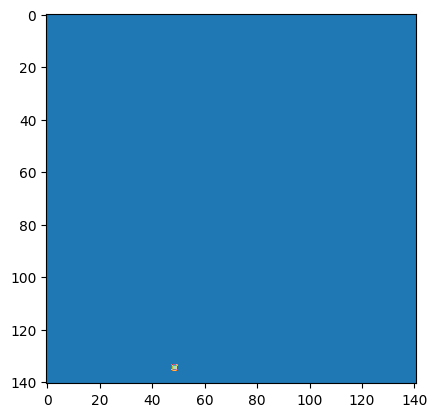

In [101]:

plt.imshow(x, cmap='tab20')

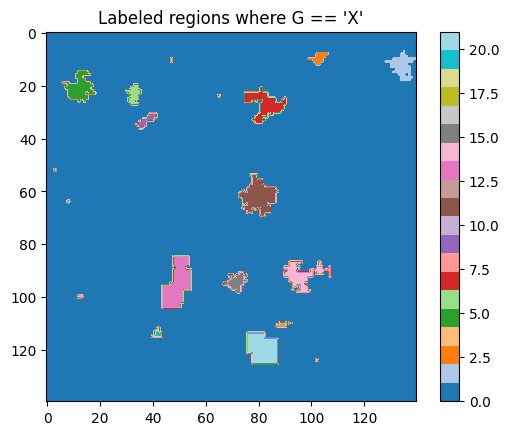

In [95]:
import matplotlib.pyplot as plt

# Label the regions where G == 'X'
#L, n = label(G == 'X')

# Display the labeled regions as an image
plt.imshow(L, cmap='tab20')
plt.colorbar()
plt.title("Labeled regions where G == 'X'")
plt.show()

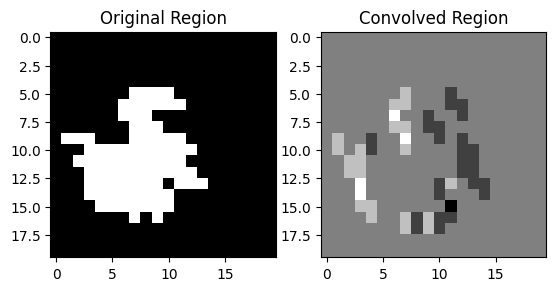

In [114]:

from scipy.ndimage import label
from scipy.signal import convolve2d

import matplotlib.pyplot as plt

# Label the regions where G == 'X'
L, n = label(G == 'X')

# Select one of the labeled regions
region_index = 5  # Change this index to display different regions
H = (L == region_index)

# Perform 2D convolution
convolved_H = convolve2d(H, [[1, -1], [1, -1]])
sub_H = H[10:30, 5:25]
conv_sub_H = convolved_H[10:30, 5:25]
# Display the original region
plt.subplot(1, 2, 1)
plt.imshow(sub_H, cmap='gray')
plt.title("Original Region")

# Display the convolved region
plt.subplot(1, 2, 2)
plt.imshow(conv_sub_H, cmap='gray')

plt.title("Convolved Region")

plt.show()

/var/folders/__/_vxw12qx36xgzk1qzy21bbtm0000gp/T/ipykernel_88913/2102641279.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0, 0.96])


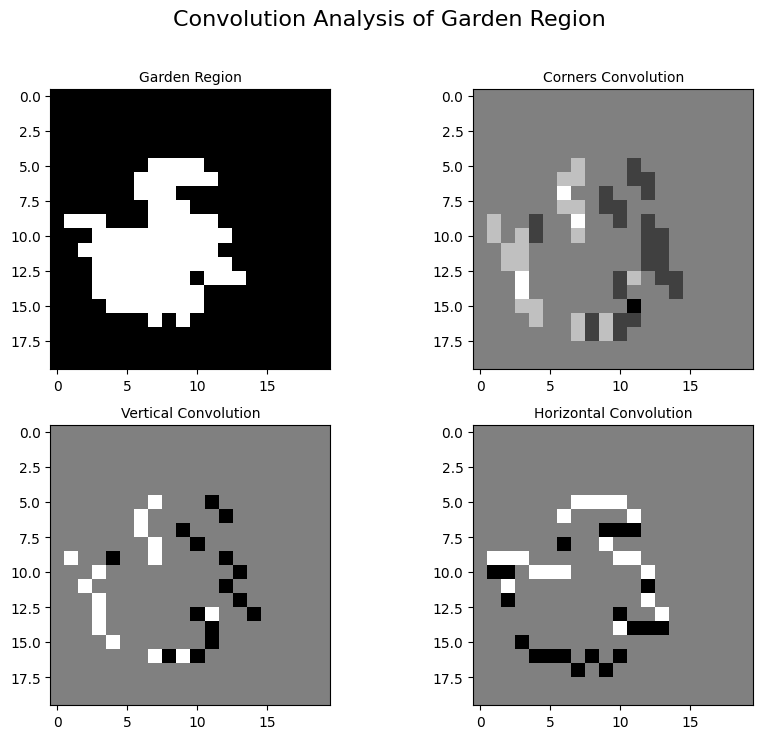

In [117]:
plt.figure(figsize=(10, 8))
plt.suptitle("Convolution Analysis of Garden Region", fontsize=16)

horizontal_convolution = convolve2d(H, [[1, -1]])
vertical_convolution = convolve2d(H, [[1], [-1]])

# Display the original region
plt.subplot(2, 2, 1)
plt.imshow(sub_H, cmap='gray')
plt.title("Garden Region", fontsize=10)

# Display the convolved region
plt.subplot(2, 2, 2)
plt.imshow(conv_sub_H, cmap='gray')
plt.title("Corners Convolution", fontsize=10)

# Display the horizontal convolution
plt.subplot(2, 2, 3)
plt.imshow(horizontal_convolution[10:30, 5:25], cmap='gray')
plt.title("Vertical Convolution", fontsize=10)

# Display the vertical convolution
plt.subplot(2, 2, 4)
plt.imshow(vertical_convolution[10:30, 5:25], cmap='gray')
plt.title("Horizontal Convolution", fontsize=10)

plt.tight_layout(rect=[0, 0, 0, 0.96])
plt.show()